Notebook to test interpolation of Predictions and whole datasets from and to the icosahedral grid.

In [1]:
from interpolate import *
from evaluate import *
import copy

In [2]:
conditions = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING": False, 
                            "CLIMATE_MODEL": "iHadCM3",
                            "GRID_TYPE": "Flat"},  # {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",# {"MODEL_TYPE": "UNet_Flat",
                                   "USE_COORD_CONV": False, 
                                   "USE_CYLINDRICAL_PADDING": False,
                                   "LOSS": "Masked_MSELoss",
                                   "LEARNING_RATE": 5e-3}
                                   # "RUN_NR": 0}
}

base_folder = "Output/Reproduce_new"
output_folder = "Scripts/"

In [11]:
d_l, p_l, gt_l, m_l = load_data_for_comparison(base_folder, conditions)

10 matching runs found


In [3]:
predictions_list, descriptions_list = load_compatible_available_runs(base_folder, conditions)

10 matching runs found


In [4]:
data, gt = get_interpolated_data_and_gt(descriptions_list[0], predictions_list[0], output_folder=base_folder, script_folder=output_folder)

Datasets/iHadCM3/Original/isotopes_yearly.nc



Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.81s 28MB].
Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.08s 22MB].


done


Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    remap: Processed 693792 values from 1 variable over 99 timesteps [0.28s 29MB].
Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    remap: Processed 693792 values from 1 variable over 99 timesteps [0.08s 26MB].


Interpolated file already exists, use existing version.
1 matching runs found


In [11]:
r2 = get_r2(data, gt)

In [9]:
from plotting import *

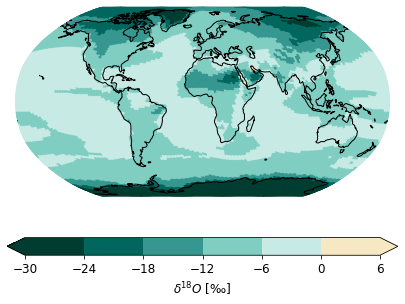

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': mean_style["PROJECTION"]}, figsize=mean_style["FIGSIZE"])

plot_ico_map(ax, np.mean(gt,axis=(0)), {"RESOLUTION": 5}, mean_style)

plt.axis("off")
plt.show()

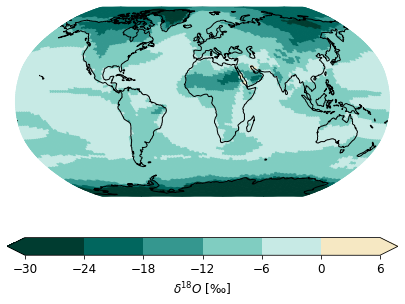

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': mean_style["PROJECTION"]}, figsize=mean_style["FIGSIZE"])

plot_ico_map(ax, np.mean(data,axis=(0)), {"RESOLUTION": 5}, mean_style)

plt.axis("off")
plt.show()

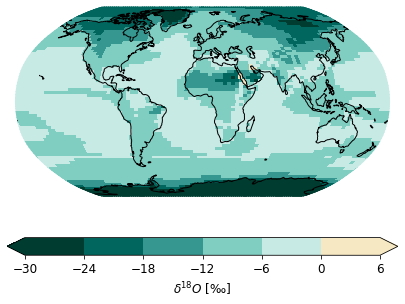

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': mean_style["PROJECTION"]}, figsize=mean_style["FIGSIZE"])

plot_map(ax, np.mean(gt_l[0],axis=(0,1)), descriptions_list[0]["DATASET_DESCRIPTION"], mean_style)

plt.axis("off")
plt.show()

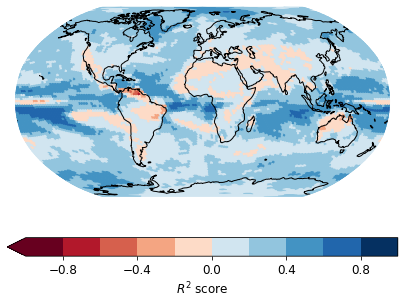

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': r2_style["PROJECTION"]}, figsize=r2_style["FIGSIZE"])

plot_ico_map(ax, r2, {"RESOLUTION": 5}, r2_style)

plt.axis("off")
plt.show()

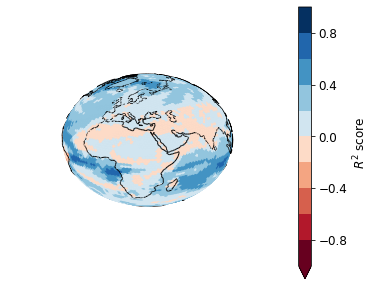

In [20]:
fig = plt.figure(figsize=r2_style["FIGSIZE"])

ax= fig.add_subplot(1,1,1, projection='3d')

plot_map_3d(ax, r2, {"RESOLUTION": 5}, r2_style,azim=30)

plt.axis("off")
plt.show()

How does the uninterpolated version look like?

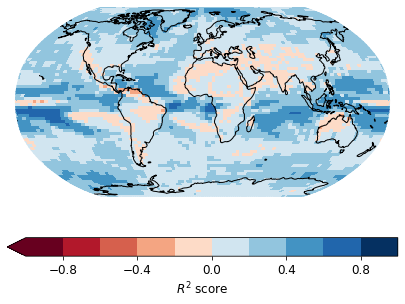

In [21]:
r2 = get_r2(p_l[0], gt_l[0])

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': r2_style["PROJECTION"]}, figsize=r2_style["FIGSIZE"])
plot_map(ax, r2[0], descriptions_list[0]["DATASET_DESCRIPTION"], r2_style)

plt.axis("off")
plt.show()

# Interpolate Ico $\Rightarrow$ Flat

In [3]:
conditions = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING": False, 
                            "CLIMATE_MODEL": "iHadCM3",
                            "GRID_TYPE": "Ico"},  # {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Ico",# {"MODEL_TYPE": "UNet_Flat",
                                   "LEARNING_RATE": 5e-3}
                                   # "RUN_NR": 0}
}

base_folder = "Output/Reproduce_new"
output_folder = "Scripts/"

In [4]:
predictions_list, descriptions_list = load_compatible_available_runs(base_folder, conditions)

10 matching runs found


In [5]:
data, gt = get_interpolated_data_and_gt(descriptions_list[0], predictions_list[0], output_folder=base_folder, script_folder=output_folder)

cdo(1) setgrid: Process started
cdo    remapcon: YAC first order conservative weights from unstructured (10230) to lonlat (96x73) grid
cdo(1) setgrid: Processed 1012968 values from 2 variables over 99 timesteps.
cdo    remapcon: Processed 1012968 values from 2 variables over 99 timesteps [0.88s 35MB].
cdo(1) setgrid: Process started
cdo    remapcon: YAC first order conservative weights from unstructured (10) to lonlat (96x73) grid
cdo(1) setgrid: Processed 1188 values from 2 variables over 99 timesteps.
cdo    remapcon: Processed 1188 values from 2 variables over 99 timesteps [0.12s 23MB].



When interpolating back to flat grid, only the 6nbs file is used, because otherwise we have wrong results due to overlap.
Interpolated file already exists, use existing version.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.


In [17]:
conditions = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING": False, 
                            "CLIMATE_MODEL": "iHadCM3",
                            "GRID_TYPE": "Flat"},  # {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",# {"MODEL_TYPE": "UNet_Flat",
                                   "USE_COORD_CONV": False, 
                                   "USE_CYLINDRICAL_PADDING": False,
                                   "LOSS": "Masked_MSELoss",
                                   "LEARNING_RATE": 5e-3}
                                   # "RUN_NR": 0}
}

base_folder = "Output/Reproduce_new"
output_folder = "Scripts/"

d_l, p_l, gt_l, m_l = load_data_for_comparison(base_folder, conditions)

10 matching runs found


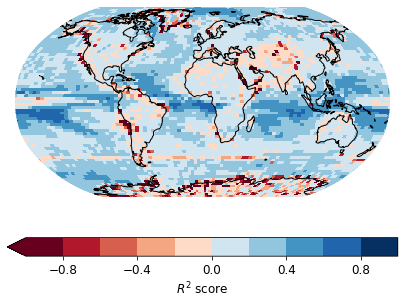

In [20]:
r2 = get_r2(data, gt)

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': r2_style["PROJECTION"]}, figsize=r2_style["FIGSIZE"])
plot_map(ax, r2, d_l[0]["DATASET_DESCRIPTION"], r2_style)

plt.axis("off")
plt.show()

In [27]:
from evaluate import *
get_weighted_average(r2[np.newaxis,...], d_l[0]["DATASET_DESCRIPTION"])

masked_array(data=[0.1388000259008686],
             mask=[False],
       fill_value=1e+20)

# Interpolate GT

In [24]:
conditions = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING": False, 
                            "CLIMATE_MODEL": "iHadCM3",
                            "GRID_TYPE": "Flat"},  # {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",# {"MODEL_TYPE": "UNet_Flat",
                                   "USE_COORD_CONV": False, 
                                   "USE_CYLINDRICAL_PADDING": False,
                                   "LOSS": "Masked_MSELoss",
                                   "LEARNING_RATE": 5e-3}
                                   # "RUN_NR": 0}
}

base_folder = "Output/Reproduce3"
output_folder = "Scripts/"

In [25]:
predictions_list, descriptions_list = load_compatible_available_runs(base_folder, conditions)

1 matching runs found


In [26]:
ds = find_and_load_dataset(descriptions_list[0]["MODEL_TRAINING_DESCRIPTION"]["DATASET_FOLDER"], \
                      descriptions_list[0]["DATASET_DESCRIPTION"])

In [27]:
d = copy.copy(descriptions_list[0])
d["MODEL_TRAINING_DESCRIPTION"]["CONTAINS_GT"] = True

In [28]:
interpolate_predictions(d, ds["test"]["targets"], output_folder=base_folder, script_folder=output_folder, do_scaling=False)

('t', 'level-1_5', 'latitude', 'longitude')
('t', 'latitude', 'longitude')
t
is in dimscopy
longitude
is in dimscopy
latitude
is in dimscopy
level-1_4
level-1_5
level-1_6
{'t': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 't', size = 0, 'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 96, 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 73}
['t', 'latitude', 'longitude']
['latitude', 'longitude']



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.80s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.09s 22MB].


done


cdo    remap: Processed 700800 values from 1 variable over 100 timesteps [0.30s 29MB].
cdo    remap: Processed 700800 values from 1 variable over 100 timesteps [0.07s 26MB].


writing predictions
writing descriptions
done


In [29]:
base_folder = "Output/Reproduce_new"
conditions = {
    "DATASET_DESCRIPTION": {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",# {"MODEL_TYPE": "UNet_Flat",
                                   "USE_COORD_CONV": True, 
                                   "USE_CYLINDRICAL_PADDING": True,
                                   "LOSS": "Masked_AreaWeightedMSELoss",
                                   "LEARNING_RATE": 5e-3,
                                   "CONTAINS_GT": True}
                                   # "RUN_NR": 0}
}

# base_folder = "Output/Reproduce_new"
# output_folder = "Scripts/"

In [30]:
predictions_list, descriptions_list = load_compatible_available_runs(base_folder, conditions)

1 matching runs found


In [31]:
ignore_vars = ["RESULTS_INTERPOLATED", "LATITUDES_SLICE", "LATITUDES", "LONGITUDES", "GRID_SHAPE", "RESOLUTION", "INTERPOLATE_CORNERS", "INTERPOLATION"]

d_reduced = descriptions_list[0]["DATASET_DESCRIPTION"]
for l in ignore_vars:
    d_reduced.pop(l, None)

In [32]:
import matplotlib.pyplot as plt
from plotting import *

In [33]:
ds = find_and_load_dataset(descriptions_list[0]["MODEL_TRAINING_DESCRIPTION"]["DATASET_FOLDER"], \
                      d_reduced, use_prints=True)
gt = ds["test"]["targets"].reshape(ds["test"]["targets"].shape[0],-1)

Difference: GRID_TYPE Original: Flat Condition: Ico
Difference: GRID_TYPE Original: Flat Condition: Ico


In [36]:
r2 = get_r2(gt, predictions_list[0])

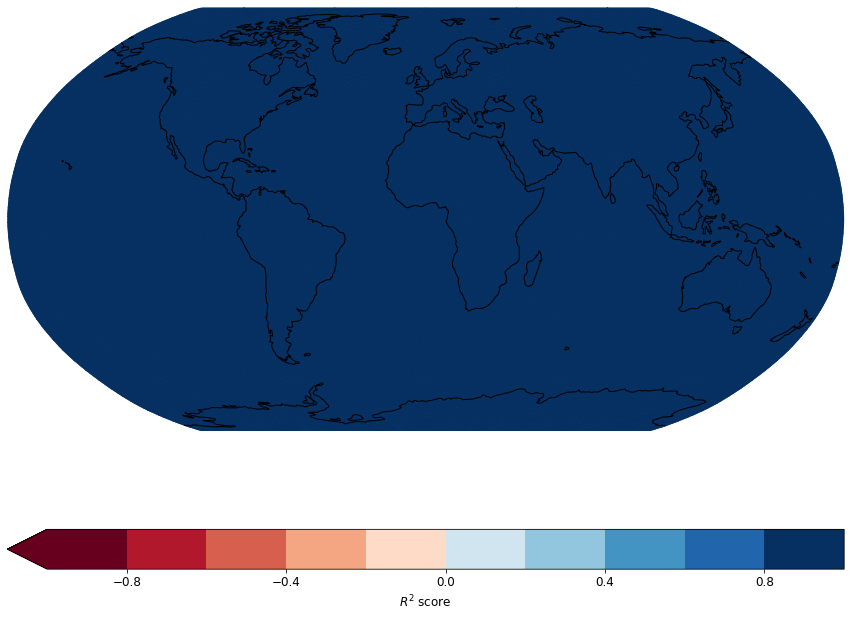

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': r2_style["PROJECTION"]}, figsize=r2_style["FIGSIZE"])

plot_ico_map(ax, r2, {"RESOLUTION": 5}, r2_style)

plt.axis("off")
plt.show()

# Icosahedral datasets.

In [140]:
for cm in ["iCESM", "iHadCM3", "isoGSM", "GISS", "ECHAM5"]:
    for var_name in ["isotopes", "tsurf", "prec"]:
        print(cm, var_name)
        interpolate_climate_model_data_to_ico_grid(model_name=cm, variable_name=var_name, script_folder="Scripts/",
                                                       dataset_folder="Datasets/", resolution=5, interpolation="cons1")

iHadCM3 isotopes



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 3 variables over 1 timestep [0.74s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 3 variables over 1 timestep [0.02s 25MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6800)


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6813)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6815)
cdo    remap: Processed 24240672 values from 3 variables over 1153 timesteps [6.04s 41MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6800)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6813)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6815)
cdo    remap: Processed 24240672 values from 3

iHadCM3 temp



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.74s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [1.89s 35MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [0.07s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid


iHadCM3 precip



cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.74s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [1.90s 35MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [0.07s 30MB].


In [141]:
for cm in ["iHadCM3"]:
    for var_name in ["isotopes", "temp", "precip", "slp"]:
        print(cm, var_name)
        interpolate_climate_model_data_to_ico_grid(model_name=cm, variable_name=var_name, script_folder="Scripts/",
                                                       dataset_folder="Datasets_old/", resolution=5, interpolation="cons1")

iHadCM3 isotopes



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 3 variables over 1 timestep [0.74s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 3 variables over 1 timestep [0.02s 25MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6800)


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6813)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6815)
cdo    remap: Processed 24240672 values from 3 variables over 1153 timesteps [6.00s 41MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6800)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6813)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6815)
cdo    remap: Processed 24240672 values from 3

iHadCM3 temp



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.74s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 24MB].


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [1.79s 35MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [0.07s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid


iHadCM3 precip



cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.74s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [1.79s 35MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [0.10s 29MB].


iHadCM3 slp



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.80s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 22MB].


done


cdo    remap: Processed 8073216 values from 1 variable over 1152 timesteps [0.90s 31MB].
cdo    remap: Processed 8073216 values from 1 variable over 1152 timesteps [0.13s 28MB].
